In [1]:
# Import Libraries
import numpy as np
import pandas as pd

# Set Directory Paths

import os
import sys

scripts_dir = os.path.join(os.path.dirname(os.getcwd()), 'scripts')
sys.path.append(scripts_dir)

In [2]:
from ncaa_record_scrape import scrape_ncaa_reocrds

recordsdf = scrape_ncaa_reocrds()

In [3]:
# COLLECT AND CLEAN RECORDS FROM USA SWIMMING DATABASE

from usasw_clean_data import clean_ncaa_record_data
other_records = '../data/NCAA_records_(USASw).csv'
other_records = clean_ncaa_record_data(other_records)

In [4]:
# COMBINE AND REMOVE DUPLICATES

# Combine the two dataframes and fill in any columns that do not exist in the other dataframe with NaN
total_records = pd.concat([other_records,recordsdf], axis=0, sort=False)

# determine how many duplicates there are by time, season, name
from clean_combined_records import drop_duplicates
total_records = drop_duplicates(total_records)

# Fix inconsistencies in names
total_records['name'] = total_records['name'].apply(
      lambda x: 'Hugo Gonzalez' if 'Hugo Gonzalez' in x else x)

# Drop duplicates but keep the instance with more complete data
total_records = drop_duplicates(total_records)
total_records.sort_values(by=['season'], ascending=False).sort_values(
      by=['distance', 'stroke', 'gender','time_(seconds)'], ascending=True, inplace=True)
total_records.reset_index(drop=True, inplace=True)

In [ ]:
total_records.to_csv('../data/total_records.csv', index=False)

In [6]:
from clean_combined_records import clean_combined_records, fact_checked_records, calculate_record_stats

total_records = clean_combined_records(total_records)
total_records = fact_checked_records(total_records)
total_records = calculate_record_stats(total_records)

Fact-checking Records

Changes to be made:

Women 400 IM
- Julia Smit 2009: 4:01.56 (https://www.swimmingworldmagazine.com/news/pacific-10-championships-julia-smit-shoots-down-longstanding-summer-sanders-ncaa-record/)
- Julia Smit 2009: 4:00.56 ()
- Julia Smit 2010 3:58.23

To Correct:

Men 50 Free
- Missing Tom Jager 1990 record. Roland Schoeman record not valid (https://www.swimmingworldmagazine.com/news/flash-bousquet-becomes-first-man-under-19-seconds-in-50-yard-freestyle/)

Women 50 Free
- None

Men 100 Free
- Cielo 41.12 not real
- https://swimswam.com/year-hold-american-record-50-100-freestyle/

Women 100 Free
- Check Tompson to Correia at 47.56 in 2002(https://www.swimmingworldmagazine.com/news/auburn-dethrones-georgia-for-ncaa-womens-crown-coughlin-correia-kirk-ripple-set-records/)
- Correia to Coghlin at 47.47 in 2002 (https://www.espn.com/ncaa/news/2002/0323/1357043.html)

Men 200 Free
- Burnett duplicate record

Women 200 Free
- Duplicate Coughlin record

Men 500 Free
- Vanderkaay 4:09 not record

Women 500 Free
- None 

Men 1000 Free
- TK

Women 1000 Free
- TK

Men 1650 Free
- None

Women 1650 Free
- None

Men 100 Back
- Brian Retterer 45.43 1995 (https://swimnews.com/Magazine/1997/aprmag97/mensncaa.shtml, https://www.sfgate.com/sports/article/Michigan-Leads-Stanford-in-Swim-3040057.php)

Women 100 Back
- Coughlin 51.66 in 2001 (https://www.swimmingworldmagazine.com/news/womens-ncaa-div-i-coughlin-rockets-to-american-record-in-the-100-yard-backstroke-in-prelims-of-ncaa-championships/)
- Marilyn Chiang 52.36 1999

Men 200 Back
- Piersol 2003? (https://www.nytimes.com/2003/03/30/sports/colleges-men-s-swimming-2-records-for-texas-auburn-wins-title.html)

Women 200 Back
- Coughlin 1:51.02 (2001), 1:52.73 (2001)
- 1:52.98 Whitney Hedgepeth 1992 (https://swimswam.com/wp-content/uploads/2018/08/1999-Division-I-NCAA-Championships-Women-results1.pdf)

Men 100 Breast
- None

Women 100 Breast
- Annie Chandler should be 2010 not 2001
- Kristy Kowal 59.05 1998 Georgia

Men 200 Breast
- Sean Mahoney record comes before Versefeld (prelim vs final)

Women 200 Breast
- None

Men 100 Fly
- None

Women 100 Fly
- Worrell/Dahlia duplicates
- Mysty Hyman 1998 51.34 (https://calbears.com/news/2001/3/17/207758829.aspx)

Men 200 Fly
- Joe Schooling --> Joseph Schooling
- Missing Gil Stovall 2008 Record in 2000 fly (http://swimdr549.blogspot.com/2011/04/all-great-racers-part-four.html)
- Mark Dylla 2009 Record in 200 fly not real

Women 200 Fly
- limin liu 1:53.36 Nevada 2001 (https://static.lsusports.net/assets/docs/sd/pdf/02guide.pdf)

Men 200 IM
- Lochte SEC vs NCAA in 2005
- Missing George Bovell (https://www.ourmidland.com/news/article/Bovell-Sets-NCAA-Swimming-Record-7201036.php)

Women 200 IM
- First Bowmen record was in 2000

Men 400 IM
- None
  

In [15]:
# Save the total_records dataframe to a csv file
total_records.to_csv('../ncaa_record_progression.csv', index=False)

# Save the total_records dataframe to an excel file
total_records.to_excel('../ncaa_record_progression.xlsx', index=False)

# Load Data and analyze

In [5]:
total_records = pd.read_csv('ncaa_record_progression.csv')

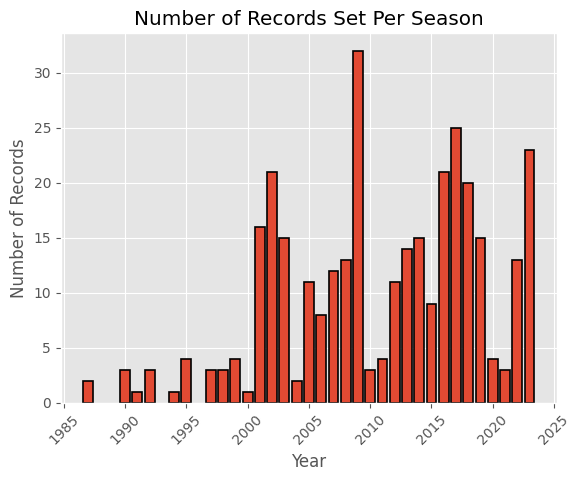

In [16]:
import matplotlib.pyplot as plt

records_by_season = total_records.groupby(['season']).count().reset_index()
records_by_season = records_by_season[['season', 'name']].rename(columns={'name': 'count'}).sort_values('count', ascending=False)

bins = np.arange(1985, 2026, 5)

# Set theme and style
plt.style.use('ggplot')

# Make a histogram of records per year
plt.bar(records_by_season['season'], 
            records_by_season['count'],
            edgecolor='black', 
            linewidth=1.2)
plt.xticks(bins, rotation=45, ha='center')
plt.xlabel("Year")
plt.ylabel("Number of Records")
plt.title("Number of Records Set Per Season")
plt.show()

In [19]:
df = total_records.copy()
df = df[df['season'] == 2012].mean(numeric_only=True)
df = df[['record_improvement_%']]

df

record_improvement_%    0.34535
dtype: float64

In [11]:
# Let's create a table of the average record improvement per season
record_improvement = total_records.groupby(['season']).mean().reset_index()
record_improvement = record_improvement[['season', 'record_improvement_%']].rename(columns={'record_improvement_%': 'avg_record_improvement_%'}).sort_values('avg_record_improvement_%', ascending=False)

/var/folders/t1/6pdtpf554kz6r9fx9czmy_700000gn/T/ipykernel_14757/166895676.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  record_improvement = total_records.groupby(['season']).mean().reset_index()


In [21]:
total_records[total_records['event_id'] == 7]

,name,distance,stroke,course,gender,season,time_(seconds),time_(string),record_broken_by,record_improvement_%,...,seasons_between_new_holders,team,conference,date,meet,event_id,athlete_id,team_id,session,meet_id
85,Gretchen Walsh,100,BK,SCY,F,2023.0,48.26,48.26,0.48,0.984817,...,1.0,Virginia,ACC,2023-03-17,2023 NCAA Division I Women's Championship,7.0,1627256.0,8136.0,Final,164414.0
86,Katharine Berkoff,100,BK,SCY,F,2022.0,48.74,48.74,0.44,0.894673,...,3.0,NC State,ACC,2022-03-18,2022 NCAA DI Women's Swimming,7.0,2321416.0,8581.0,Final,97290.0
87,Beata Nelson,100,BK,SCY,F,2019.0,49.18,49.18,0.49,0.986511,...,NaN,Wisconsin,Big,2019-03-22,2019 NCAA DI - Women,7.0,332779.0,8258.0,Final,100459.0
88,Beata Nelson,100,BK,SCY,F,2019.0,49.67,49.67,0.02,0.040250,...,2.0,Wisconsin,Big,2018-11-30,Texas Hall of Fame Swimming In,7.0,332779.0,8258.0,Final,152489.0
89,Ally Howe,100,BK,SCY,F,2017.0,49.69,49.69,0.28,0.560336,...,16.0,Stanford,NaN,2017-02-23,NaN,7.0,995123.0,8528.0,NaN,NaN
90,Natalie Coughlin,100,BK,SCY,F,2002.0,49.97,49.97,0.60,1.186474,...,NaN,California,NaN,2002-01-01,NaN,7.0,2255128.0,8084.0,NaN,NaN
91,Natalie Coughlin,100,BK,SCY,F,2002.0,50.57,50.57,0.66,1.288308,...,NaN,California,N,2002-02-26,Unknown Record Meet 1074,7.0,2255128.0,7969.0,NaN,157488.0
92,Natalie Coughlin,100,BK,SCY,F,2001.0,51.23,51.23,0.43,0.832365,...,NaN,California,N,2001-01-01,Unknown Record Meet 1074,7.0,2255128.0,7969.0,NaN,157488.0
93,Natalie Coughlin,100,BK,SCY,F,2001.0,51.66,51.66,0.70,1.336898,...,2.0,California,N,2001-01-01,Unknown Record Meet 1074,7.0,2255128.0,7969.0,NaN,157488.0
94,Marylyn Chiang,100,BK,SCY,F,1999.0,52.36,52.36,NaN,NaN,...,NaN,California,NaN,1999-01-01,NaN,7.0,752006.0,8084.0,NaN,NaN
